In [24]:
# Coin Detection and Amount Calculation

## Import Libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max


In [34]:
# Load images
coins = cv.imread('coins.png', cv.IMREAD_GRAYSCALE)
assert coins is not None

dime = cv.imread('Dime.png', cv.IMREAD_GRAYSCALE)
assert dime is not None

nickel = cv.imread('Nickel.png', cv.IMREAD_GRAYSCALE)
assert nickel is not None

penny = cv.imread('Penny.png', cv.IMREAD_GRAYSCALE)
assert penny is not None

quarter = cv.imread('Quarter.png', cv.IMREAD_GRAYSCALE)
assert quarter is not None

(-0.5, 299.5, 299.5, -0.5)

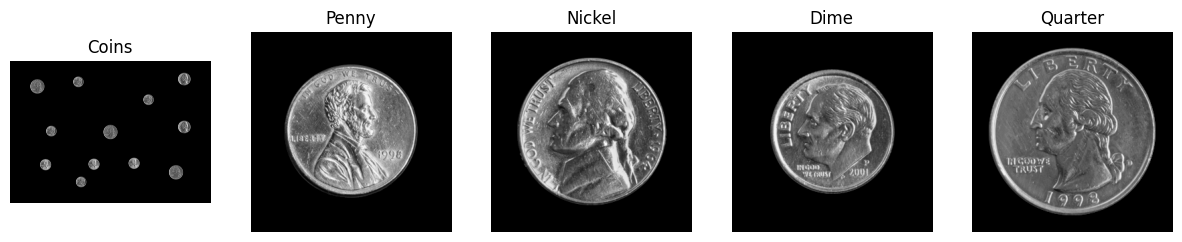

In [35]:
# Display Images
plt.figure(figsize=(15, 10))
plt.subplot(1, 5, 1)
plt.imshow(coins, cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')


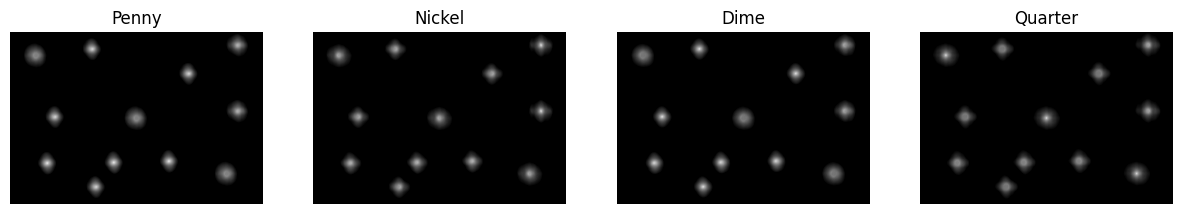

In [36]:
# Template Matching
penny_resp = cv.matchTemplate(coins, penny, cv.TM_CCOEFF_NORMED)
nickel_resp = cv.matchTemplate(coins, nickel, cv.TM_CCOEFF_NORMED)
dime_resp = cv.matchTemplate(coins, dime, cv.TM_CCOEFF_NORMED)
quarter_resp = cv.matchTemplate(coins, quarter, cv.TM_CCOEFF_NORMED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(penny_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(nickel_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dime_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(quarter_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter')
plt.axis('off')
plt.show()


In [37]:
# Color settings
pastel_colors = [
    (255, 182, 193),  # pink
    (173, 216, 230),  # blue
    (119, 221, 119),  # green
    (253, 253, 150)   # yellow
]

coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)


In [46]:
# Template names and responses
templates = [penny, nickel, dime, quarter]
template_names = ['Penny', 'Nickel', 'Dime', 'Quarter']
responses = [penny_resp, nickel_resp, dime_resp, quarter_resp]



In [40]:
# Dictionary to count the number of each coin
coin_counts = {name: 0 for name in template_names}

# Process each template
for i, (template, response, name) in enumerate(zip(templates, responses, template_names)):
    h, w = template.shape
    coordinates = peak_local_max(response, min_distance=20, threshold_abs=0.9)
    coin_counts[name] = len(coordinates)
    for coord in coordinates:
        cv.rectangle(coins_color, (coord[1], coord[0]), (coord[1] + w, coord[0] + h), pastel_colors[i], 2)
        cv.putText(coins_color, name, (coord[1], coord[0] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, pastel_colors[i], 2, cv.LINE_AA)

In [41]:
# Draw legend
for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    cv.rectangle(coins_color, (30, 115 + 20 * i), (50, 135 + 20 * i), color, -1)
    cv.putText(coins_color, name, (60, 130 + 20 * i), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv.LINE_AA)

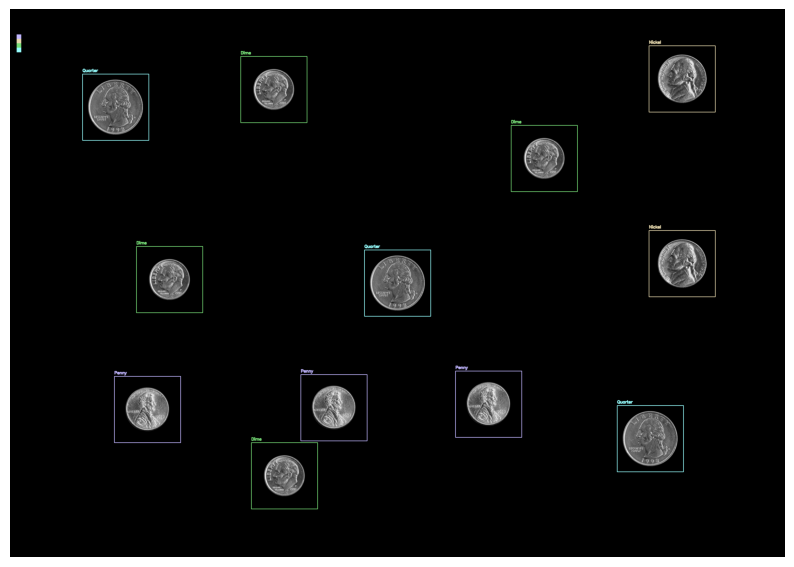

In [42]:
# Display final image
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(coins_color, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [43]:
# Print the number of each coin type
for name, count in coin_counts.items():
    print(f"{name}: {count}")

Penny: 3
Nickel: 2
Dime: 4
Quarter: 3


In [44]:
# Calculate the total amount of money
amount = 0.01 * coin_counts['Penny'] + 0.05 * coin_counts['Nickel'] + 0.1 * coin_counts['Dime'] + 0.25 * coin_counts['Quarter']
print(f"Total amount: ${amount:.2f}")

Total amount: $1.28


#Assumptions
1. There is no noise in the background.
2. The selected template matching method is the most suitable one.
3. There are no overlapping coins.
4. The selected threshold is sufficient.
